In [7]:
# take a cdf file
# read it in and plot
# then write to separate binary files
# then read it back in and plot 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

A = [0,1,2,3,4,5,6,7,8,9]

print (split_list(A, wanted_parts=1))
print (split_list(A, wanted_parts=4))
print (split_list(A, wanted_parts=8))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[0, 1], [2, 3, 4], [5, 6], [7, 8, 9]]
[[0], [1], [2], [3, 4], [5], [6], [7], [8, 9]]


In [10]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i+n]

In [11]:
def rect(T):
    """create a centered rectangular pulse of width $T"""
    return lambda t: (-T/2 <= t) & (t < T/2)

def pulse_train(t, at, shape):
    """create a train of pulses over $t at times $at and shape $shape"""
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)

sig = pulse_train(
    t=np.arange(100),              # time domain
    at=np.array([0, 10, 40, 80]),  # times of pulses
    shape=rect(3)                 # shape of pulse
)

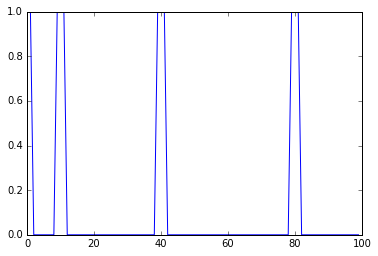

In [12]:
plt.plot (sig)

In [13]:
from bitstring import BitArray
from bitstring import Bits



VersionNo          =BitArray('0b000')
TypeInd            =BitArray('0b0')
PackSecHdrFlag     =BitArray('0b1')
Apid               =BitArray('0b00100100100')
SequenceFlags      =BitArray('0b01')
SourceSequencCount =BitArray(int=5, length=14)
PacketDataLength   =Bits(int=1442, length=16)
PacketSecHeader    =Bits(int=12, length=16)
SourceData         =Bits(int=12, length=1442)

FirstSestet = VersionNo
PacketId = TypeInd
PacketId += PackSecHdrFlag
PacketId += Apid

FirstSestet += PacketId


PacketSecControl=SequenceFlags+SourceSequencCount

FirstSestet.bin

print(FirstSestet.bin)
print(PacketSecControl.bin)
print(PacketDataLength.bin)


Header=FirstSestet
Header += PacketSecControl
Header += PacketDataLength



file='ccsds2.bin'
with open(file,'wb') as f:
    FirstSestet.tofile(f)
    PacketSecControl.tofile(f)
    PacketDataLength.tofile(f)


0b0000100100100100
0b0100000000000101
0b0000010110100010


In [ ]:
# declare 2d array of sample data

a=np.eye(500,500)
size=8

print ('size',size)

# flatten 2d array into 1d array

b=np.ravel(a)
print (b)

# break up into subsections 

lenb=len(b)

numfiles=int (np.ceil(lenb*1.0/size))

fullsize=size*numfiles


print ("fullsize ",fullsize)
print (numfiles)

diff=fullsize-lenb
print (diff)
zerodiff=np.zeros(diff)


# pad/extend file to fit exactly into required 
# space
c=np.append(b, zerodiff )


# take each element and pack it into 12 bits each
# 12*8 = 6*16 bits = 96 bits
# saves 25% of space


print ("use bitstring to bitpack the data")

import bitstring as bs

# create foramt string, unsigned int (uint) 12 bits long
format=str(size)+'*(uint:12)'
data_arr=range(size)

# test the packing function
e = bs.pack(format,*data_arr) 


for i in range(0, numfiles ):
    filename="ccsds_packed_bits"+str(i+1).zfill(4)+".dat" 
    print ("create file "+" "+filename)
    format=str(size)+'*(uint:12)'
    data_arr=c[i*size:(i+1)*size]
    packedbits = bs.pack(format,*data_arr)
    #print (data_arr)
    #print (packedbits)
    print (" - write header, data to file")
    with open(filename,'wb') as f:
        FirstSestet.tofile(f)
        PacketSecControl.tofile(f)
        PacketDataLength.tofile(f)
        packedbits.tofile(f)
    




size 8
[ 1.  0.  0. ...,  0.  0.  1.]
fullsize  250000
31250
0
use bitstring to bitpack the data
create file  ccsds_packed_bits0001.dat
 - write header, data to file
create file  ccsds_packed_bits0002.dat
 - write header, data to file
create file  ccsds_packed_bits0003.dat
 - write header, data to file
create file  ccsds_packed_bits0004.dat
 - write header, data to file
create file  ccsds_packed_bits0005.dat
 - write header, data to file
create file  ccsds_packed_bits0006.dat
 - write header, data to file
create file  ccsds_packed_bits0007.dat
 - write header, data to file
create file  ccsds_packed_bits0008.dat
 - write header, data to file
create file  ccsds_packed_bits0009.dat
 - write header, data to file
create file  ccsds_packed_bits0010.dat
 - write header, data to file
create file  ccsds_packed_bits0011.dat
 - write header, data to file
create file  ccsds_packed_bits0012.dat
 - write header, data to file
create file  ccsds_packed_bits0013.dat
 - write header, data to file
create